# 数据准备

In [1]:
from sklearn.datasets import load_wine
data=load_wine()
X,Y=data.data,data.target

from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

print(X_train.shape,Y_train.shape)

(142, 13) (142,)


# 模型基础
首先计算各个类别的均值向量与整体数据的均值向量。

In [2]:
import numpy as np
n_samples,n_features=X_train.shape

mu=np.mean(X_train,axis=0)    # 数据均值，向量

mu_k=list()    # 类均值向量，(K,n_feature)
for k in np.unique(Y_train):
    mu_k.append(np.mean(X_train[Y_train==k],axis=0))
mu_k=np.array(mu_k)

print(mu.shape,mu_k.shape)

(13,) (3, 13)


类内散度矩阵与类间散度矩阵：

In [3]:
n_k = list()    # 类别计数

S_w = np.zeros((n_features, n_features))    # 类内散度矩阵
for k in np.unique(Y_train):
    n_k.append(len(X_train[Y_train == k]))
    tmp = X_train[Y_train == k]-mu_k[k]
    S_w += np.dot(tmp.T, tmp)

S_b=np.dot(n_k*(mu_k-mu).T,(mu_k-mu))    # 类间散度矩阵

接下来的任务就是要找到映射方向，使得类间散度最大而类内散度最小。类似于PCA的原理，可以通过对$S_{w}^{-1}S_{b}$做特征值分解，最大特征值对应的特征向量即满足要求的映射方向。

In [4]:
eigval,eigvec=np.linalg.eig(np.dot(np.linalg.inv(S_w),S_b))    # 注意特征值与特征向量可能出现复数情况
top_idx=np.argsort(eigval)[::-1]    # 特征值的排序索引
top_vec=eigvec[:,top_idx[:2]]    # 取前两个特征向量

X_trans=np.dot(X_train,top_vec.real)    # 只取特征向量的实部做运算

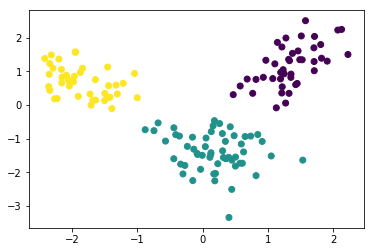

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X_trans[:,0],X_trans[:,1],c=Y_train)
plt.show()

## 对比sklearn中的LDA降维变换

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis(n_components=2)
X_trans=lda.fit_transform(X_train,Y_train)

plt.scatter(X_trans[:,0],X_trans[:,1],c=Y_train)
plt.show()